<a href="https://colab.research.google.com/github/anmolecule/Tutorial_ML/blob/main/Tutorial_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np

In [ ]:
arr=[1.2, 2.4, 3.5, 4.7, 6.1, 7.2, 8.3, 9.5]
nparr=np.array(arr)
nparr

array([1.2, 2.4, 3.5, 4.7, 6.1, 7.2, 8.3, 9.5])

In [ ]:
brr=[[6, 5], [11, 7], [4, 8]]
npbrr=np.array(brr)
npbrr

array([[ 6,  5],
       [11,  7],
       [ 4,  8]])

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [ ]:
np.random.randint(low=1, high=101, size=(10))

array([58, 15, 49, 72, 62, 51,  4, 68, 67, 47])

In [ ]:
np.random.random(10) 

array([0.84993359, 0.51798265, 0.28793806, 0.06304832, 0.46509094,
       0.51544882, 0.56747853, 0.1148981 , 0.52751612, 0.60142602])

In [ ]:
# Scale between 3 to 5
np.random.random(10)*(5-3)+3

array([4.96130108, 3.8366504 , 3.88346679, 3.25660352, 4.86362136,
       3.0168579 , 4.69233204, 4.01678198, 3.38208131, 4.91245235])

In [ ]:
#Generalize the above formula 
#Scale a random number, r generate between ra and rb to a random number between a and b. Assume b>a and rb>ra

In [8]:
import pandas as pd

In [9]:
# Create and populate a 5x2 NumPy array.
my_data = np.array([[0, 3], [10, 7], [20, 9], [30, 14], [40, 15]])

# Create a Python list that holds the names of the two columns.
my_column_names = ['temperature', 'activity']

# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity
0            0         3
1           10         7
2           20         9
3           30        14
4           40        15


In [10]:
# Create a new column named adjusted.
my_dataframe["adjusted"] = my_dataframe["activity"] + 2

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity  adjusted
0            0         3         5
1           10         7         9
2           20         9        11
3           30        14        16
4           40        15        17


In [11]:
print("Rows #0, #1, and #2:")
print(my_dataframe.head(3), '\n')

print("Row #2:")
print(my_dataframe.iloc[[2]], '\n')

print("Rows #1, #2, and #3:")
print(my_dataframe[1:4], '\n')

print("Column 'temperature':")
print(my_dataframe['temperature'])

Rows #0, #1, and #2:
   temperature  activity  adjusted
0            0         3         5
1           10         7         9
2           20         9        11 

Row #2:
   temperature  activity  adjusted
2           20         9        11 

Rows #1, #2, and #3:
   temperature  activity  adjusted
1           10         7         9
2           20         9        11
3           30        14        16 

Column 'temperature':
0     0
1    10
2    20
3    30
4    40
Name: temperature, dtype: int64


In [16]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])


In [17]:
df.loc['cobra', 'shield']

2

In [18]:
df.loc[['viper', 'sidewinder']]


,max_speed,shield
viper,4,5
sidewinder,7,8


# Minimizing loss function using gradient descent

In [ ]:
def loss(theta,X,y):
    '''
    Calculate loss.
    Parameters:
      X: Input array
      y: Output array
      theta: coefficients (weights)
    Returns:
      l: Loss 
    '''
    # Calculating Loss
    l = (1/2*len(y)) * np.sum(np.square((X.dot(theta))-y))  
    return l


In [ ]:
def gradient_descent(X,y,theta,alpha,iterations):
    '''
    Parameters:
      X: Input matrix with added bias.
      y: target variable matrix
      theta: regression coefficients
      alpha: learning rate
      iteration: number of iteration to be run
    Returns 
      theta: Updated theta
      loss: Cost
    '''
    #Getting number of observations.
    m = len(y)
    
    # Initializing loss and theta's arrays with zeroes.
    thetas = np.zeros((iterations,2))
    losses = np.zeros(iterations)
    niter=None
    # Calculating theta for every iteration.
    for i in range(iterations):
            theta = theta - (1/m)*alpha*(X.T.dot((X.dot(theta))-y))
            thetas[i,:] = theta.T
            newloss=loss(theta,X,y)
            if i> 1:
                tol=newloss-losses[i-1]
                if abs(tol)<0.0001: 
                    niter=i
                    break
            losses[i] = newloss
            
    return theta,thetas,losses,niter


<Figure size 1080x1800 with 0 Axes>

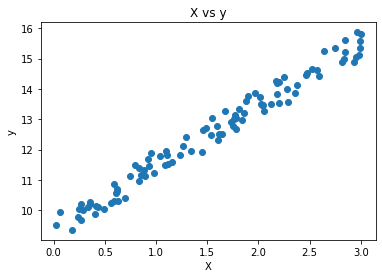

<Figure size 1080x1800 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
# Generating Randomized dataset
X = 3*np.random.rand(100,1)
y = 9 + 2*X+np.random.rand(100,1)
# Scatter plot
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('X vs y')
plt.figure(figsize=(15,25))

In [ ]:
# Learning Rate  # Change 
alpha = 0.4
# Number of iterations  # Change the number 
max_iterations = 30000


In [ ]:
# Initializing a random value to give algorithm a base value. Theta0: bias (intercept) Theta1: weight (slope)
theta = np.random.randn(2,1)
print (theta)

[[ 0.07332808]
 [-1.17809403]]


In [ ]:
# Adding a biasing constant of value 1 to the features array.
X_bias = np.c_[np.ones((len(X),1)),X]
# Running Gradient Descent
theta,thetas,losses,niter = gradient_descent(X_bias,y,theta,alpha,max_iterations)
# printing final values.
print('Final Theta 0 value: {:0.3f}\nFinal Theta 1 value: {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final Cost/MSE(L2 Loss) Value: {:0.3f} acheived in {:5f}'.format(losses[-1],niter))

Final Theta 0 value: 9.410
Final Theta 1 value: 2.040
Final Cost/MSE(L2 Loss) Value: 0.000 acheived in 110.000000


# Create Model using LinearRegression in sklearn

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9761404283106984

In [13]:
reg.coef_

array([[2.0420018]])

In [14]:
reg.intercept_

array([9.41070304])

In [15]:
reg.predict(np.array([[3]]))


array([[15.53670844]])

# Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X, y = np.arange(100).reshape((50, 2)), range(50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test

array([[26, 27],
       [78, 79],
       [60, 61],
       [90, 91],
       [34, 35],
       [96, 97],
       [52, 53],
       [50, 51],
       [64, 65],
       [38, 39]])

# Test Train Validation Split

In [ ]:
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Use L2 Regularization

In [6]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, y)
clf.predict(np.array([[3]]))

array([[15.49620993]])